# Rishabh Pal

## Research question/interests

Some of my interests with this dataset are-
1. Finding out what the top 5 categories of app downloads are along with the top downloaded apps from each of those categories. 
2. I also want to explore if the top downloaded categories correlate with the rated categories.
3. I want to explore if paid apps have higher overall ratings than free apps


In [144]:
# Library Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Datset
df = pd.read_csv('../data/raw/google_play_store.csv')

df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Milestone 3
## Task 1: Exploratory Data Analysis


In [2]:
df.shape

(10841, 13)

In [3]:
df.describe(include = 'all').T
# Lot os null values


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [7]:
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [8]:
df.Price.value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [9]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<AxesSubplot:xlabel='Content Rating', ylabel='Count'>

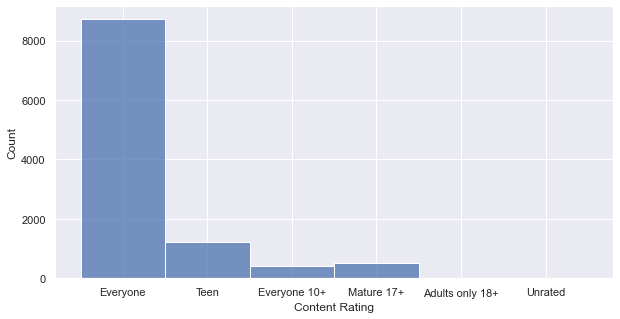

In [10]:
sns.set(rc={"figure.figsize":(10, 5)}) #width=6, height=5
sns.histplot(data = df,x = 'Content Rating')

# Task 2: Analysis Pipeline


### 1 - Load Data 
Data has already been loaded above

### 2 - Clean Data


In [136]:
# Remove unwanted columns
df = df.drop(["Last Updated","Current Ver","Android Ver"],axis=1)

# Remove rows with null values
df = df.dropna()
# Reset Index
df = df.reset_index()

# Remove '+' and ',' from installs column to make it numeric
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].astype(float)

# Convert all app sizes to MB
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

# Replace 'Varies with device' with 'Nan' from size column to make it numeric
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

# Remove 'M' from size column to make it numeric
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].astype(float)

# Remove '$' from price column to make it numeric
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].astype(float)

# Renaming some columns
df = df.rename(columns = {'App':'App Name', 'Size':'Size (MB)', 'Price':'Price ($)'})


df.head()


,index,App Name,Category,Rating,Reviews,Size (MB),Installs,Type,Price ($),Content Rating,Genres
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity


## Task 3: Method Chain

In [118]:
def load_and_process(url_or_path_to_csv_file):
    #Method Chain
    df1 = (
        pd.read_csv(url_or_path_to_csv_file)
        .drop(["Last Updated","Current Ver","Android Ver"],axis=1)
        .dropna()
        .reset_index()
        .rename(columns = {'App':'App Name', 'Price':'Price_USD','Size':'Size_MB'})
        )
    df1['Installs'] = df1['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
    df1['Installs'] = df1['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
    df1['Installs'] = df1['Installs'].astype(float)
    df1['Size_MB'] = df1['Size_MB'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
    df1['Size_MB'] = df1['Size_MB'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
    df1['Size_MB'] = df1['Size_MB'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
    df1['Size_MB'] = df1['Size_MB'].astype(float)
    df1['Price_USD'] = df1['Price_USD'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
    df1['Price_USD'] = df1['Price_USD'].astype(float)                
    
    return df1


In [219]:
import project_functions2 as p2
final = p2.load_and_process('../data/raw/google_play_store.csv')
final

,index,App Name,Category,Rating,Reviews,Size_MB,Installs,Type,Price_USD,Content Rating,Genres
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...,...
9361,10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education
9362,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education
9363,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education
9364,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference


# Task 4 - Data Analysis

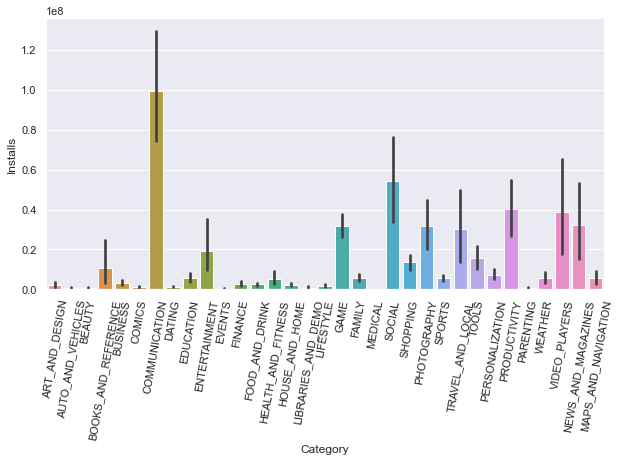

In [253]:
App_Cat = final.groupby('Category')['Installs'].sum()[1]

sns.barplot(x = 'Category',
            y = 'Installs',
        data = final
)
plt.xticks(rotation=80)

plt.show()

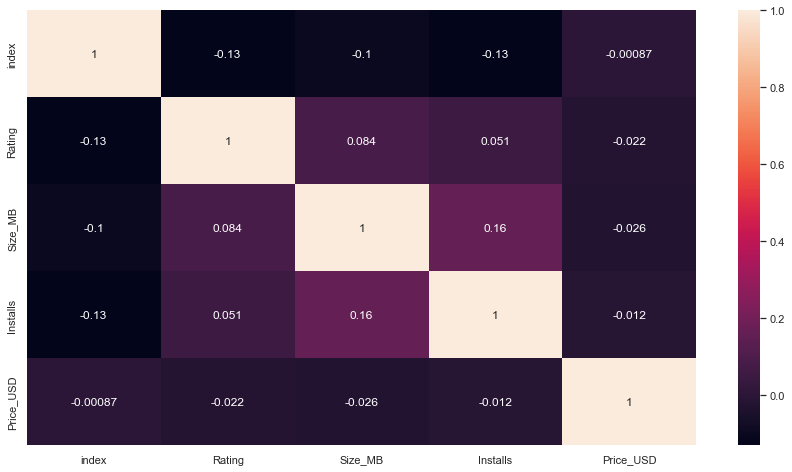

In [163]:
plt.figure(figsize=(15,8))
corr= final.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [249]:
df.groupby('Category')['Installs'].sum()

Category
1.9                                                                 Free
ART_AND_DESIGN         10,000+500,000+5,000,000+50,000,000+100,000+50...
AUTO_AND_VEHICLES      100,000+1,000,000+100,000+1,000,000+100,000+10...
BEAUTY                 500,000+1,000,000+100,000+500,000+1,000,000+50...
BOOKS_AND_REFERENCE    100,000,000+50,000+100,000+10,000,000+100,000,...
BUSINESS               10,000,000+50,000,000+10,000,000+5,000,000+1,0...
COMICS                 10,000,000+500,000+1,000,000+500,000+50,000+50...
COMMUNICATION          1,000,000,000+1,000,000,000+10,000,000+1,000,0...
DATING                 10,000+1,000+50+100+100+100+10,000,000+10,000,...
EDUCATION              100,000,000+10,000,000+100,000+5,000,000+10,00...
ENTERTAINMENT          100,000,000+1,000,000+1,000,000+10,000,000+50,...
EVENTS                 100,000+5,000,000+500,000+50,000+5,000,000+1,0...
FAMILY                 50,000,000+10,000,000+100,000,000+1,000,000+5,...
FINANCE                10,000,000+1,000,00

,index,App Name,Category,Rating,Reviews,Size_MB,Installs,Type,Price_USD,Content Rating,Genres
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...,...
9361,10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education
9362,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education
9363,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education
9364,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference


In [225]:
df_no_outlier = final.copy()

category = list(df_no_outlier['Category'].unique())
for i in category:
    q3 = df_no_outlier.loc[df_no_outlier['Category']==i,'Installs'].quantile(0.75)
    q1 = df_no_outlier.loc[df_no_outlier['Category']==i,'Installs'].quantile(0.25)
    med = df_no_outlier.loc[df_no_outlier['Category']==i,'Installs'].quantile(0.50)
    iqr = q3 - q1
    upper_bound = q3 + (iqr*1.5)
    lower_bound = q1 - (iqr*1.5)
    df_no_outlier.loc[(df_no_outlier['Category']==i) & (df_no_outlier['Installs']>upper_bound) | (df_no_outlier['Installs']<lower_bound),'Installs'] = med

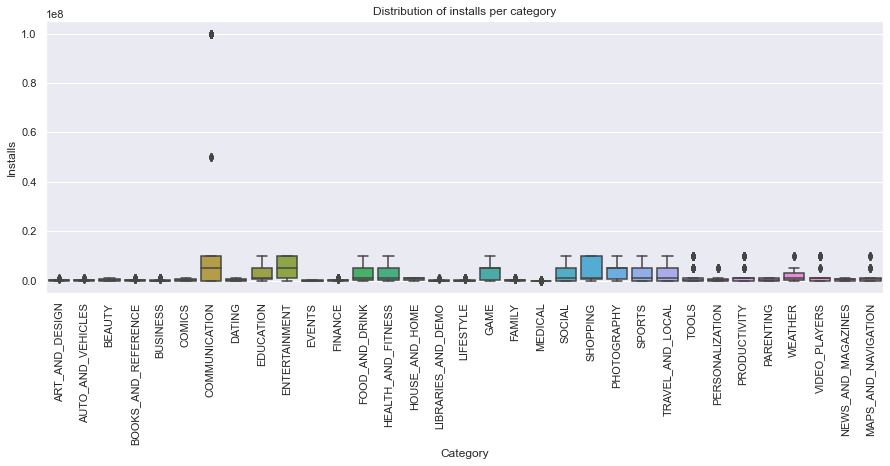

In [256]:
avg = final.groupby('Category', as_index=False)['Installs'].mean()

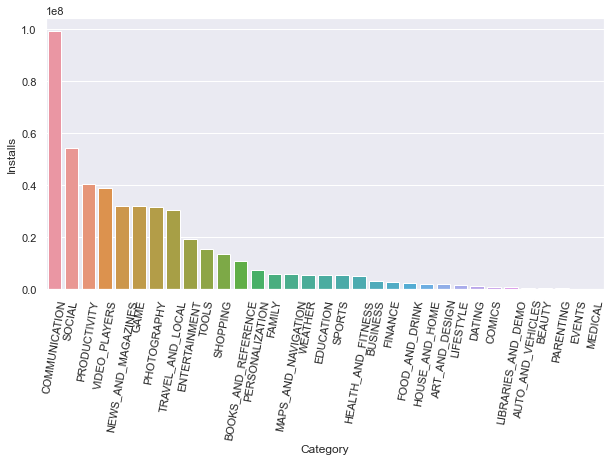

In [263]:
sns.barplot(x = 'Category',
            y = 'Installs',
        data = sort
)
plt.xticks(rotation=80)

plt.show()

In [262]:
sort = final.groupby('Category',as_index=False)['Installs'].mean().sort_values('Installs',ascending=False)